In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import os
from datetime import datetime, timedelta


I want to plot the simulated winds for WLEF ( at 30 and 100m) with the measured winds. Both 1 minute and 30 minute averaged.

For WLEF I don't have to go through Brian's processed data. Can pull them in from the server. 

In [2]:
pwd()

'/mnt/c/Users/Sreenath/Documents/palm/Cheyenne/realistic_IOP03'

In [17]:
tower_data = xr.open_dataset('tower_data/tower_and_meta_data.nc')
tower_data.close()

#subset for 2019 Sep 24 and Sep25
f1 = tower_data.time>=267
f2 = tower_data.time<=269

In [18]:
#calculate time variable and offset for UTC
tower_data['time'] = (tower_data.DOY+tower_data.hour/24+tower_data.minute/60/24 - 5/24)
tower_data = tower_data.set_coords(['time'])


In [19]:
tower_data

<xarray.Dataset>
Dimensions:   (timestep: 5616, tower: 17)
Coordinates:
  * timestep  (timestep) float32 0.0 1.0 2.0 ... 5.613e+03 5.614e+03 5.615e+03
  * tower     (tower) |S3 b'nw1' b'nw2' b'nw3' b'nw4' ... b'se4' b'se5' b'se6'
    time      (timestep) float64 170.8 170.8 170.8 170.9 ... 287.7 287.7 287.8
Data variables:
    cov_wT    (timestep, tower) float32 ...
    cov_wH2O  (timestep, tower) float32 ...
    cov_wCO2  (timestep, tower) float32 ...
    f_Hs      (timestep, tower) float32 ...
    f_Hl      (timestep, tower) float32 ...
    f_CO2     (timestep, tower) float32 ...
    ustar     (timestep, tower) float32 ...
    wstar     (timestep, tower) float32 ...
    R_net     (timestep, tower) float32 ...
    ghf       (timestep, tower) float32 ...
    S_store   (timestep, tower) float32 ...
    T_store   (timestep, tower) float32 ...
    Q_store   (timestep, tower) float32 ...
    u         (timestep, tower) float32 ...
    v         (timestep, tower) float32 ...
    w         (timestep, tower) float32 ...
    T         (timestep, tower) float32 ...
    q         (timestep, tower) float32 ...
    year      (timestep) float32 ...
    month     (timestep) float32 ...
    day       (timestep) float32 ...
    DOY       (timestep) int32 ...
    hour      (timestep) float32 0.0 0.0 1.0 1.0 2.0 ... 22.0 22.0 23.0 23.0
    minute    (timestep) float32 0.0 30.0 0.0 30.0 0.0 ... 0.0 30.0 0.0 30.0
    z_meas    (tower) float32 ...

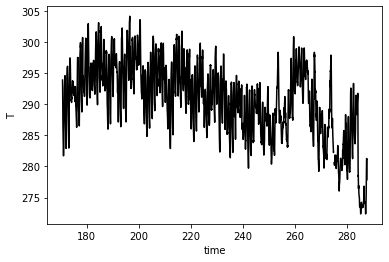

In [20]:
tower_data['T'].mean(dim='tower').plot(color='black',x='time')

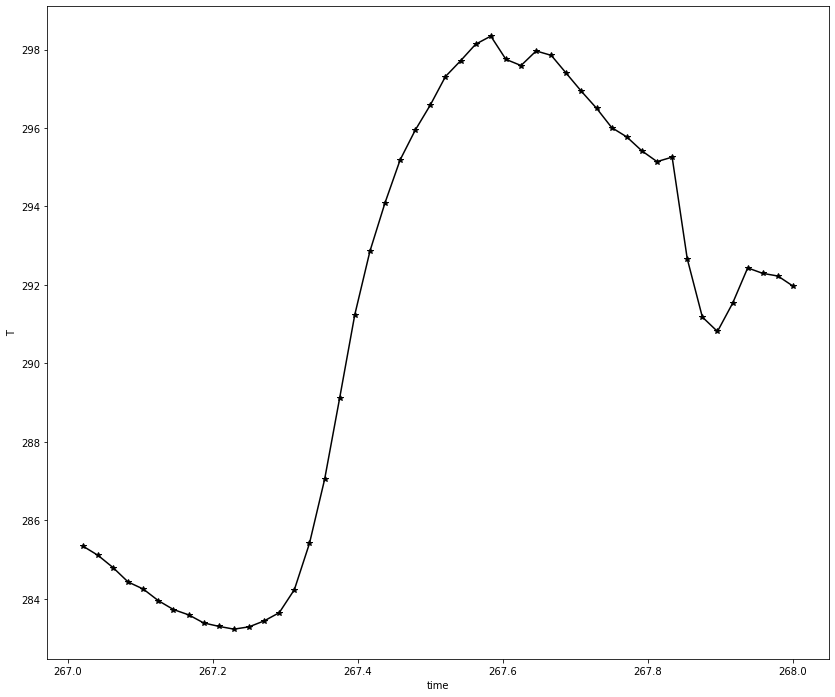

In [26]:
#subset for 2019 Sep 24 and Sep25
f1 = tower_data.time>=267
f2 = tower_data.time<268
tower_data['T'].where(f1 & f2).mean(dim='tower').plot(color='black',x='time',marker = '*', figsize=(14,12))

In [30]:
np.shape(tower_data['T'].where(f1 & f2,drop=True).mean(dim='tower'))

(48,)